# Running PCRGlobWB using the eWaterCycle system

**This notebook assumes that the ewatercycle has already been set up for your system.**
See system setup documentation for instructions.

This notebook runs the PCRGlobWB example parameterset comes from https://github.com/UU-Hydro/PCR-GLOBWB_input_example. 
This means that you have access to the PCRGlobWB singularity image, the example parameterset including forcing data has been downloaded and added to a configuration file.


In [1]:
import ewatercycle
import ewatercycle.models
import ewatercycle.forcing
import ewatercycle.parameter_sets
ewatercycle.CFG.load_from_file('ewatercycle.yaml')

/home/peter/miniconda3/envs/ewatercycle/lib/python3.9/site-packages/esmvalcore/experimental/_warnings.py:18: UserWarning: 
  Thank you for trying out the new ESMValCore API.
  Note that this API is experimental and may be subject to change.
  More info: https://github.com/ESMValGroup/ESMValCore/issues/498
/home/peter/miniconda3/envs/ewatercycle/lib/python3.9/site-packages/esmvalcore/experimental/config/_config_validators.py:254: ESMValToolDeprecationWarning: `write_plots` will be removed in 2.4.0.
/home/peter/miniconda3/envs/ewatercycle/lib/python3.9/site-packages/esmvalcore/experimental/config/_config_validators.py:255: ESMValToolDeprecationWarning: `write_netcdf` will be removed in 2.4.0.


In [2]:
parameter_set = ewatercycle.parameter_sets.get_parameter_set('pcrglobwb_example_case')
print(parameter_set)

Parameter set
-------------
name=pcrglobwb_example_case
directory=/home/peter/ewatercycle/ewatercycle/docs/examples/parameter-sets/pcrglobwb_example_case
config=/home/peter/ewatercycle/ewatercycle/docs/examples/parameter-sets/pcrglobwb_example_case/setup_natural_test.ini
doi=N/A
target_model=pcrglobwb
supported_model_versions={'setters'}


In [3]:
# This example case would work without forcing, because the forcing is already part of the parameterset.
# However, for the purpose of example, we show how the forcing would be loaded using the ewatercycle.forcing module. 
forcing = ewatercycle.forcing.load_foreign(
    target_model = "pcrglobwb",
    start_time = "2001-01-01T00:00:00Z",
    end_time = "2010-12-31T00:00:00Z",
    directory = "./parameter-sets/pcrglobwb_example_case/forcing",
    shape = None,
    forcing_info = dict(
        precipitationNC = "precipitation_2001to2010.nc",
        temperatureNC = "temperature_2001to2010.nc"
))
print(forcing)

Forcing data for PCRGlobWB
--------------------------
Directory: /home/peter/ewatercycle/ewatercycle/docs/examples/parameter-sets/pcrglobwb_example_case/forcing
Start time: 2001-01-01T00:00:00Z
End time: 2010-12-31T00:00:00Z
Shapefile: None
Additional information for model config:
  - temperatureNC: temperature_2001to2010.nc
  - precipitationNC: precipitation_2001to2010.nc


In [4]:
pcrglob = ewatercycle.models.PCRGlobWB(version="setters", parameter_set=parameter_set, forcing=forcing)

In [5]:
pcrglob.parameters

[('start_time', '2001-01-01T00:00:00Z'),
 ('end_time', '2001-01-01T00:00:00Z'),
 ('routing_method', 'accuTravelTime'),
 ('max_spinups_in_years', '20')]

In [6]:
# We can modify all settings above during the setup. Here's how to use a different forcing file
cfg_file, cfg_dir = pcrglob.setup(end_time='2001-02-28T00:00:00Z', max_spinups_in_years=5)
cfg_file, cfg_dir

('/home/peter/ewatercycle/ewatercycle/docs/examples/pcrglobwb_20210709_085057/pcrglobwb_ewatercycle.ini',
 '/home/peter/ewatercycle/ewatercycle/docs/examples/pcrglobwb_20210709_085057')

In [7]:
pcrglob.parameters

[('start_time', '2001-01-01T00:00:00Z'),
 ('end_time', '2001-02-28T00:00:00Z'),
 ('routing_method', 'accuTravelTime'),
 ('max_spinups_in_years', '5')]

In [8]:
pcrglob.initialize(str(cfg_file))

In [9]:
pcrglob.output_var_names[:3]

('groundwater_recharge',
 'lake_and_reservoir_storage',
 'domesticWaterConsumptionVolume')

In [10]:
pcrglob.get_value("discharge")

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,
        0.,  0.,  0.,  0., nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0., nan,
       nan, nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,
        0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan, nan,
       nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan,  0.,
       nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0., na

In [11]:
pcrglob.get_value_as_xarray("discharge")

<xarray.DataArray 'discharge' (latitude: 13, longitude: 17)>
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,
        nan, nan, nan, nan],
       [nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan,
        nan, nan, nan, nan],
       [nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        nan, nan, nan, nan],
       [nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        nan,  0., nan, nan],
       [nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., nan],
       [nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan,
        nan, nan, nan, nan],
       [nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan,
        nan, nan, nan, nan],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan,
        nan, nan, nan, nan],
       [nan,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan]])
Coordinates:
  * longitude  (longitude) float64 3.75 4.25 4.75 5.25 ... 10.75 11.25 11.75
  * latitude   (latitude) float64 46.25 46.75 47.25 47.75 ... 51.25 51.75 52.25
    time       object 2000-12-31 00:00:00
Attributes:
    units:    m3.s-1

In [12]:
# Run the model for a few steps and show progress every tenth step
for i in range(100):
    if i % 10 == 0:
        print(pcrglob.time_as_isostr)
    pcrglob.update()

36524.0
36534.0
36544.0
36554.0
36564.0
36574.0
36584.0
36594.0
36604.0
36614.0


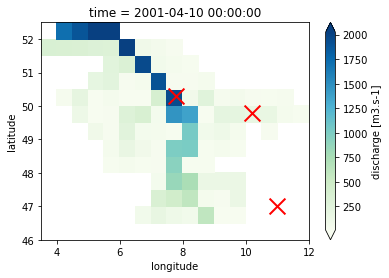

In [13]:
da = pcrglob.get_value_as_xarray("discharge")
qm = da.plot(robust=True, cmap='GnBu')

# Add some verification points
target_longitudes = [7.8, 10.2, 11]
target_latitudes = [50.3, 49.8, 47]
qm.axes.scatter(target_longitudes, target_latitudes, s=250, c='r', marker='x', lw=2)

In [14]:
# Verify that we can get the right values at the target locations
pcrglob.get_value_at_coords('discharge', lon=target_longitudes, lat=target_latitudes)

Requested point was lon: 7.8, lat: 50.3; closest grid point is 7.75, 50.25.
Requested point was lon: 10.2, lat: 49.8; closest grid point is 10.25, 49.75.
Requested point was lon: 11, lat: 47; closest grid point is 10.75, 47.25.


array([1950.56518555,  163.59661865,           nan])

In [14]:
pcrglob.finalize()